In [49]:
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
train_df = pd.read_csv('HDD_train.csv')
train_df = train_df.drop(['No. Frames (3fps)', 'No. Frames for Training (80%)', 'Time (Minutes)'], axis=1)
train_df = train_df.set_index('Date')
#train_data = train_df.to_numpy()

In [41]:
scaler = StandardScaler()
scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns, index=train_df.index)
scaled_train_df

/usr/local/lib/python3.9/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


,No. LeftTurns,No. RightTurns,No. LeftLaneChange,No. RightLaneChange,Avg No. Frames Merge,Avg No. Frames Per LeftLane Change,Avg No. Frames Per RightLane Change,Avg No. Frames Per Uturn,Avg Acceleration (excl frames w 0acceleration),Max Acceleration,...,Avg Yaw Rate on LeftLaneChange,Yaw Rate Var on LeftLaneChange,Avg Yaw Rate on RightLaneChange,Yaw Rate Var on RightLaneChange,Avg Yaw Rate on LeftLaneBranch,Yaw Rate Var on LeftLaneBranch,Avg Yaw Rate onRightLaneBranch,Yaw Rate Var on RightLaneBranch,Distance to nearest preceding vehicle,how long before left lane branch does driver do left lane change
Date,,,,,,,,,,,,,,,,,,,,,
201702271017,0.087154,0.746045,0.177137,0.285682,NaN,-1.107551e+00,-1.178471e+00,NaN,-1.231674e-01,3.522416e-01,...,-3.051906e-01,0.425634,-5.034089e-01,-0.548330,-2.538504e-01,-0.518164,-1.305884e+00,-0.260962,NaN,NaN
201702271123,-0.924720,-0.828002,-0.925941,-0.873977,NaN,NaN,NaN,NaN,-1.380575e-01,-1.052562e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201702271136,1.301403,0.955918,-0.925941,-0.584062,NaN,NaN,-2.307034e-01,NaN,-6.070673e-02,-4.379607e-01,...,NaN,NaN,-4.701485e-01,0.115267,-9.345115e-01,-0.161850,-9.474164e-01,-0.597607,NaN,NaN
201702271438,1.200215,2.110219,0.452906,1.735256,-0.141189,-1.929110e-01,-1.465417e-01,1.791860e-01,-2.521644e+00,-1.651946e-02,...,-7.478407e-01,0.189600,3.229026e-01,0.203313,-1.120883e+00,1.733996,-5.824899e-01,-0.473683,NaN,NaN
201702271632,1.301403,1.270727,0.728676,2.025171,-0.141189,-4.723844e-01,-4.581676e-01,-2.182690e-01,-2.928842e+00,-6.135612e-01,...,-5.215084e-01,0.188124,2.946082e-01,2.026598,-1.319988e+00,1.841734,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201710060950,-0.722345,-0.198384,0.452906,0.285682,-1.071949,-1.929110e-01,7.170641e-01,NaN,2.410640e-01,-8.945220e-01,...,7.878146e-01,-0.594961,-5.001073e-01,-0.620033,3.538825e-01,-0.695408,-8.989748e-01,-0.595147,NaN,NaN
201710061114,-0.317595,-0.408256,1.831754,0.575597,NaN,-5.740112e-01,5.275106e-01,1.371551e+00,6.677454e-01,-2.448001e-01,...,9.650008e-01,0.260278,-9.103283e-01,-0.469101,1.131781e+00,-0.008319,NaN,NaN,NaN,NaN
201710061311,-0.216408,-0.723066,0.177137,0.285682,NaN,-5.359011e-01,3.379571e-01,-4.169965e-01,5.694863e-02,-7.540416e-01,...,9.206096e-01,-0.637981,-5.720083e-01,-0.666428,9.859247e-01,-0.798168,NaN,NaN,NaN,NaN


In [62]:
#simple_cleaned_df = scaled_train_df.fillna(scaled_train_df.mean())
simple_cleaned_df = scaled_train_df.fillna(0)
wcss = []
sil = []
kmeans_kwargs = {"init": 'random',
                "n_init": 10,
                "max_iter": 300,
                "random_state": 42}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(simple_cleaned_df)
    wcss.append(kmeans.inertia_)
    if k > 1:
        sil.append(silhouette_score(simple_cleaned_df, kmeans.labels_, metric='euclidean'))

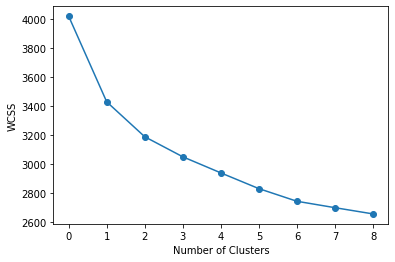

In [63]:
plt.plot(wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
# Find Elbow using knee locator
kl = KneeLocator(range(1, 10), wcss, curve="convex", direction="decreasing")
kl.elbow

3

In [65]:
sil

[0.20492169006817096,
 0.09106009737375345,
 0.0927438538937704,
 0.0975053301816069,
 0.07340555693064348,
 0.10496788426710849,
 0.057461466107939514,
 0.08006364909623165]